In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pkg import simulation
from pkg.types import ProtocolState, SpeculativeAssetState

%matplotlib inline
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_excel("data.xlsx", sheet_name="raw")
df.Date = pd.to_datetime(df.Date)

In [3]:
df = df[df.Luna.notnull()].copy()

In [4]:
df = df.sort_values("Date", ascending=True)

In [5]:
bear_periods = [["20190508", "2020-07"], ["2021-05", "2021-06"], ["2021-10", "2022-02"]]
bull_periods = [["2020-07", "2021-03"], ["2021-03", "2021-05"], ["2021-06", "2021-09"]]

In [6]:
# Display bull markets
# for bull_period in bull_periods:
#     plt.figure(figsize=(20, 10))
#     sns.lineplot(data=df[df.Date.between(*bull_period)], x="Date", y="Luna")

In [7]:
# Display bear markets
# for bear_period in bear_periods:
#    plt.figure(figsize=(20, 10))
#    sns.lineplot(data=df[df.Date.between(*bear_period)], x="Date", y="Luna")

# Bear markets

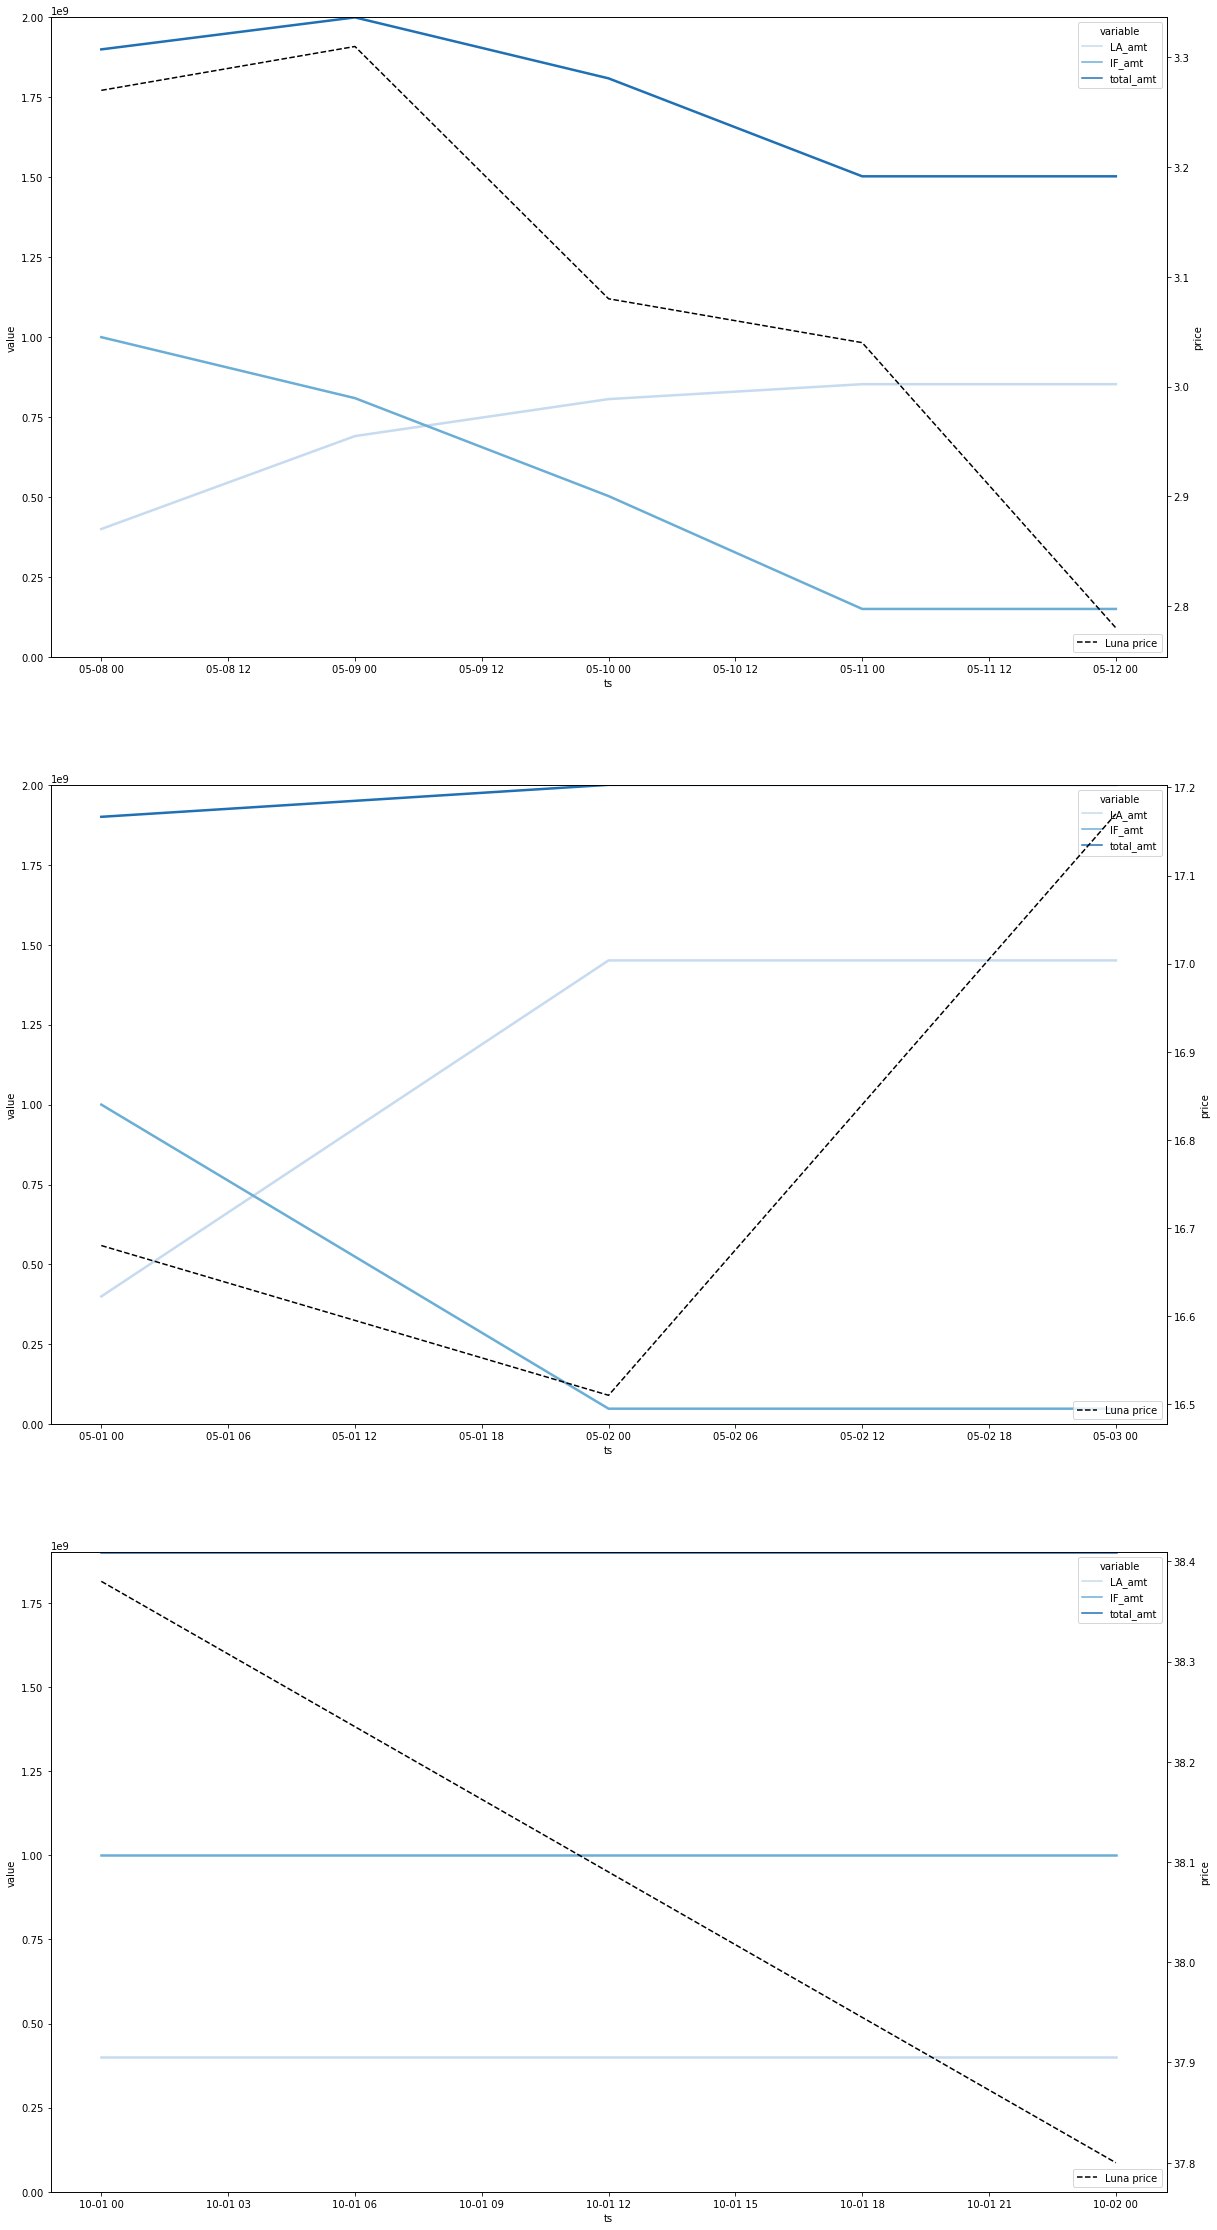

In [8]:
fig, axs = plt.subplots(len(bear_periods), 1, figsize=(20, 40))

for period, ax in zip(bear_periods, axs):

    sim = simulation.Simulator()

    current_timeserie = df[df.Date.between(*period)].reset_index(drop=True)

    result = sim.funding_payment_simulation(
        protocol=ProtocolState(LA_amt=4e8, IA_amt=5e8, IF_amt=1e9),
        prices=current_timeserie.Luna,
        timestamps=current_timeserie.Date,
        funding_rate_bps=60 * 24,
        daily_payments=1,
    )
    # result.ts = pd.to_datetime(result.ts)
    sns.lineplot(
        data=pd.melt(
            result, id_vars="ts", value_vars=["LA_amt", "IF_amt", "total_amt"]
        ),
        x="ts",
        y="value",
        hue="variable",
        ax=ax,
        palette="Blues",
        linewidth=2.5,
    )
    ax.set_ylim(0, result["total_amt"].max())

    ax2 = ax.twinx()
    sns.lineplot(
        data=result[["ts", "price"]],
        x="ts",
        y="price",
        ax=ax2,
        color="black",
        label="Luna price",
    )
    ax2.lines[0].set_linestyle("--")
    ax2.legend(loc=4)

# Bull markets

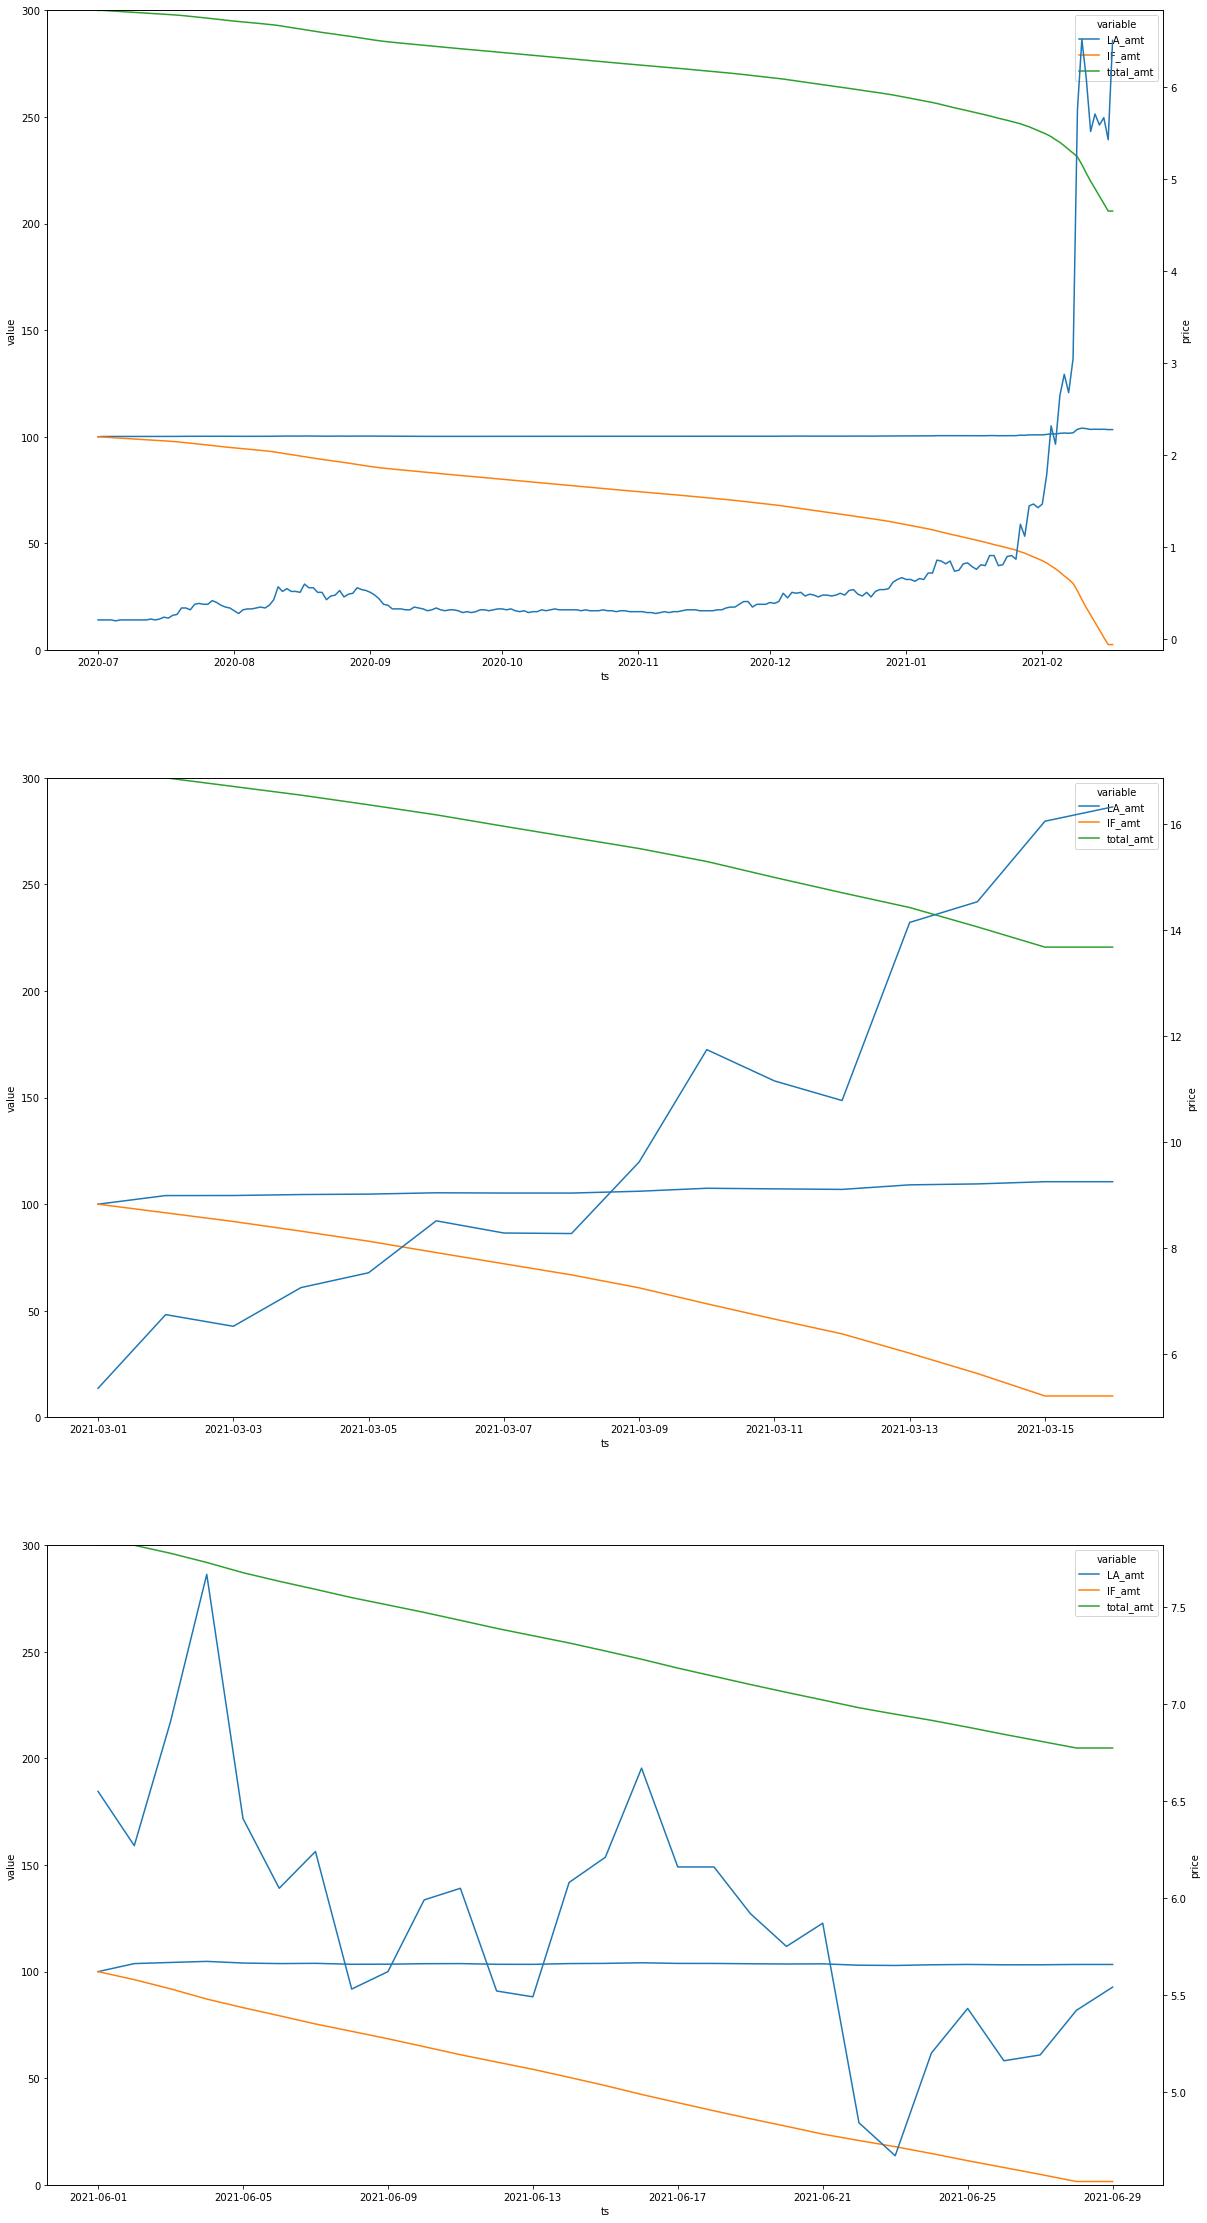

In [9]:
fig, axs = plt.subplots(len(bear_periods), 1, figsize=(20, 40))

for period, ax in zip(bull_periods, axs):

    sim = simulation.Simulator()

    current_timeserie = df[df.Date.between(*period)].reset_index(drop=True)

    result = sim.funding_payment_simulation(
        protocol=ProtocolState(100, 100, 100),
        prices=current_timeserie.Luna,
        timestamps=current_timeserie.Date,
    )
    # result.ts = pd.to_datetime(result.ts)
    sns.lineplot(
        data=pd.melt(
            result, id_vars="ts", value_vars=["LA_amt", "IF_amt", "total_amt"]
        ),
        x="ts",
        y="value",
        hue="variable",
        ax=ax,
    )
    ax.set_ylim(0, result["total_amt"].max())

    ax2 = ax.twinx()
    sns.lineplot(data=result[["ts", "price"]], x="ts", y="price", ax=ax2)

In [10]:
result

,ts,price,LA_amt,IF_amt,IA_amt,total_amt,cycles_passed
0,2021-06-01,6.55,100.000000,100.000000,100,300.000000,0
1,2021-06-02,6.27,103.762000,96.238000,100,300.000000,1
2,2021-06-03,6.91,104.301973,91.936027,100,296.238000,2
3,2021-06-04,7.67,104.799977,87.136051,100,291.936027,3
4,2021-06-05,6.41,104.030607,83.105444,100,287.136051,4
5,2021-06-06,6.05,103.776311,79.329133,100,283.105444,5
6,2021-06-07,6.24,103.885385,75.443747,100,279.329133,6
7,2021-06-08,5.53,103.446917,71.996830,100,275.443747,7
8,2021-06-09,5.62,103.488230,68.508600,100,271.996830,8
9,2021-06-10,5.99,103.719367,64.789233,100,268.508600,9
